<a href="https://colab.research.google.com/github/FernandoV17/IA_VERANOS/blob/main/decision-tree/desicion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/FernandoV17/IA_VERANOS/refs/heads/decision-tree/decision-tree/data/train.csv

--2025-07-09 23:43:45--  https://raw.githubusercontent.com/FernandoV17/IA_VERANOS/refs/heads/decision-tree/decision-tree/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-07-09 23:43:45 (4.33 MB/s) - ‘train.csv’ saved [60302/60302]



In [2]:
#Si Clonaste el Respositorio
data_path = '/content/IA_VERANOS/decision-tree/data/train.csv'

In [3]:
#Si nada mas usas google collab
data_path = '/content/train.csv'

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [5]:
data_path = "/content/train.csv"

In [6]:
df = pd.read_csv(data_path)

In [7]:
display(
    df.head().style
    .set_properties(**{'text-align': 'center'})
    .format("{:.2f}", subset=df.select_dtypes(include=['float']).columns)
)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,nan,S


In [8]:
print(df['Sex'].unique())  # Verifica si hay valores inesperados

['male' 'female']



Análisis de valores nulos en el dataset:


,Conteo Nulos
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0



Valores cero en columnas clave:


,Conteo Ceros
PassengerId,0
Survived,549
Pclass,0
Sex,577
Age,0
SibSp,608
Parch,678
Fare,15


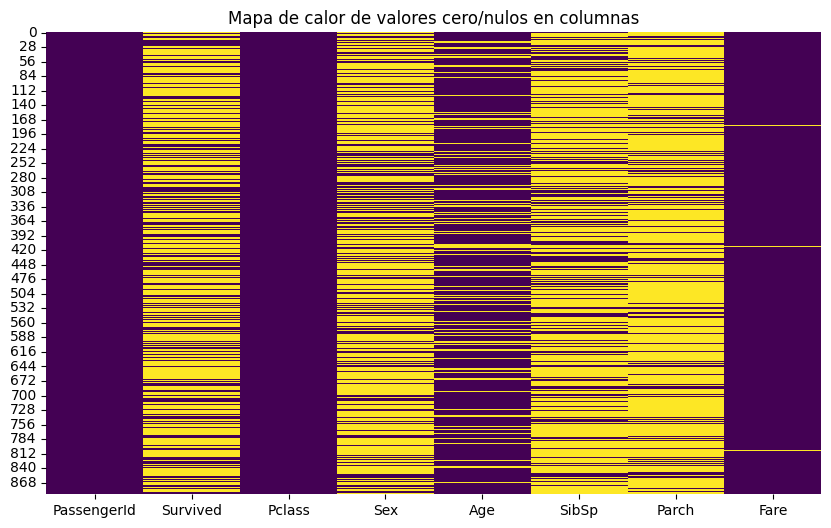


Filas con valores nulos o ceros problemáticos:

--- Survived ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S



--- Sex ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S



--- Age ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,Q



--- SibSp ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S



--- Parch ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S



--- Fare ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",0,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",0,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",0,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",0,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",0,19.0,0,0,LINE,0.0,NaN,S


In [9]:
columnas_a_excluir = ["PassengerId", "Name", "Sibs", "Parch", "Ticket", "Cabin", "Embarked", "SibSp", "Survived"]
df['Sex'] = df['Sex'].astype(str).str.strip().str.lower()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

print("\nAnálisis de valores nulos en el dataset:")
null_analysis = df.isnull().sum().to_frame('Conteo Nulos')
display(null_analysis.style.set_caption("Conteo de valores nulos por columna"))

key_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
print("\nValores cero en columnas clave:")
zero_analysis = df.select_dtypes(include=['int', 'float']).isin([0]).sum().to_frame('Conteo Ceros')
display(zero_analysis.style.set_caption("Conteo de valores cero en columnas numéricas"))

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(df[key_columns].isin([0, np.nan]), cmap='viridis', cbar=False)
plt.title("Mapa de calor de valores cero/nulos en columnas")
plt.show()

print("\nFilas con valores nulos o ceros problemáticos:")
for col in key_columns:
    zero_or_null = df[df[col].isin([0, np.nan])]
    if not zero_or_null.empty:
        print(f"\n--- {col} ---")
        display(zero_or_null.head())

In [20]:
columnas_a_excluir = ["PassengerId", "Name", "Sibs", "Parch", "Ticket", "Cabin", "Embarked", "SibSp", "Survived"]

numeric_cols = [
    col for col in df.select_dtypes(include=['int', 'float']).columns
    if col not in columnas_a_excluir
]

X = df[numeric_cols]
y = df['Survived']  # Target: 0 = No, 1 = Yes

display(X.describe().round(2))

,Pclass,Sex,Age,Fare
count,891.00,891.00,714.00,891.00
mean,2.31,0.35,29.70,32.20
std,0.84,0.48,14.53,49.69
min,1.00,0.00,0.42,0.00
25%,2.00,0.00,20.12,7.91
50%,3.00,0.00,28.00,14.45
75%,3.00,1.00,38.00,31.00
max,3.00,1.00,80.00,512.33


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
clf = DecisionTreeClassifier()

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
train_accuracy = clf.score(X_train, y_train)
print(train_accuracy)

1.0


In [24]:
y_pred = clf.predict(X_test)

In [25]:
# 'Pclass', 'Sex', 'Age', 'Fare'
test_data = pd.DataFrame([[1, 0, 12, 150]], columns=X.columns)

In [26]:
prediction = clf.predict(test_data)
probabilities = clf.predict_proba(test_data)

print(f"Predicción para {test_data.values[0]}: {'Sobrevive' if prediction[0] == 1 else 'No sobrevive'}")
print(f"Probabilidades: No={probabilities[0][0]:.2f}, Sí={probabilities[0][1]:.2f}")

Predicción para [  1   0  12 150]: Sobrevive
Probabilidades: No=0.00, Sí=1.00


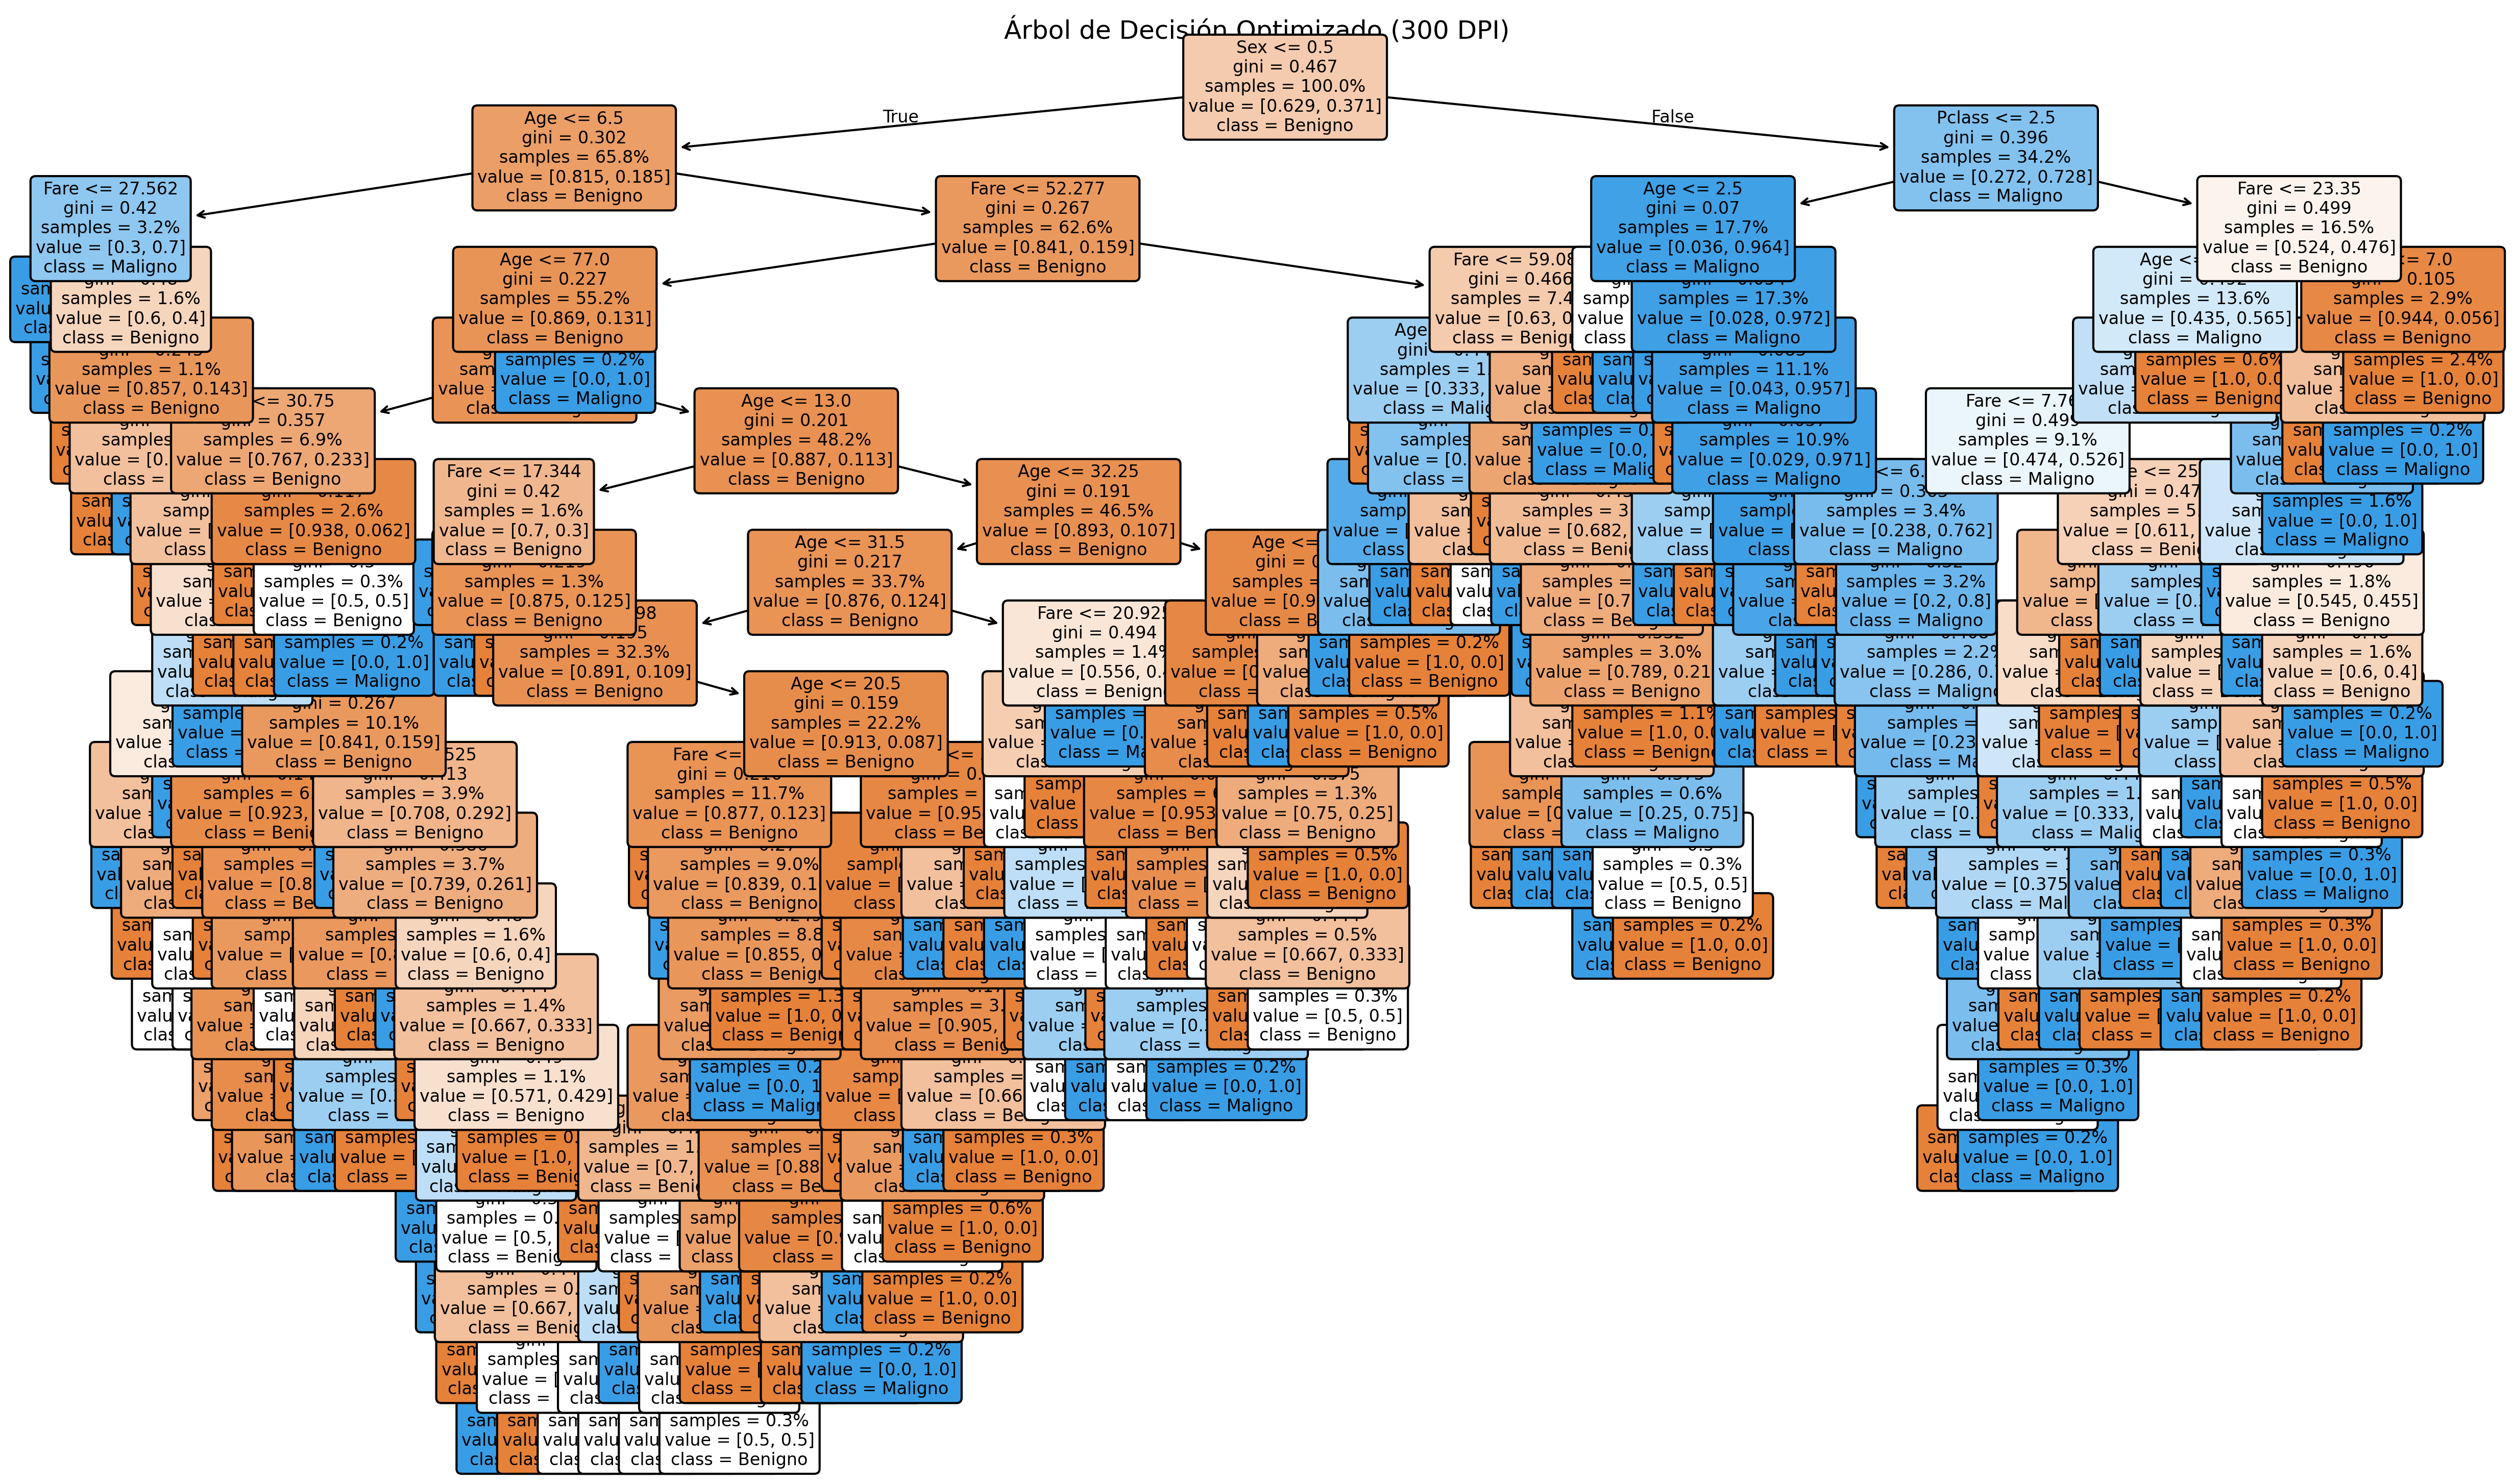

In [27]:
plt.figure(figsize=(20, 12), dpi=300)
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Benigno', 'Maligno'],
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=8
)
plt.title("Árbol de Decisión Optimizado (300 DPI)", fontsize=12)
plt.savefig('arbol_decision.png', dpi=300, bbox_inches='tight')
plt.show()

EXPERIMENTAL

In [29]:
clf = DecisionTreeClassifier(
    max_depth=100,
    min_samples_leaf=2,
    ccp_alpha=0.01
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=100, min_samples_leaf=2)

In [30]:
y_pred = clf.predict(X_test)
print("Arbol de Decision")
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicho']))

Arbol de Decision
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       157
           1       0.81      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

Predicho    0   1
Real             
0         139  18
1          33  78


In [31]:
proba = clf.predict_proba(test_data)
print(f"Probabilidades Árbol: No={proba[0][0]:.2f}, Sí={proba[0][1]:.2f}")

Probabilidades Árbol: No=0.84, Sí=0.16


EXPERIMENTAL 2


In [32]:
rf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=42)

In [33]:
rf_proba = rf.predict_proba(test_data)
print(f"Probabilidades Random Forest: No={rf_proba[0][0]:.2f}, Sí={rf_proba[0][1]:.2f}")


Probabilidades Random Forest: No=0.39, Sí=0.61
